# Round 1 decision tree/random forest
## Apical and basal dendrite classifer
Dtree and rf code source: [Jose Portilla Udemy course](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/)  
Heat map visualization code: [JR Kreiger on Medium](https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56) and [Dennis T on Medium](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)  
Feature importance code: [scikit-learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import export_text
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# 'pyr_four_nostr.csv' is the original classifier train set
# 'pyr_four_nostr_mmstats.csv' adds in 10 additional mito-to-mito distance statistics
# 'pyr_two_dendrites/nostr_mmstats.csv' removes soma and axonal; adds binary for apical_true where apical = 1, basal = 0

train = pd.read_csv('pyr_two_dendrites_nostr_mmstats.csv', index_col=[0])

In [5]:
# drop 'apical_true' column since that is used for logistic regression and not here

train = train.drop('apical_true', axis=1)
train

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
0,1783325,527936,75186,43844,1430,74824,43668,1323,75472,44120,1561,648518346349523993,300744,175376,57200,6.187842,20.482515,Basal,70864,42368,24,4778.608166,-648,-452,-238,825.137564,0,0,196.0,7493.879886,5358.067644,0.0,4229.199053,5547.331920,9169.323781,26461.627614,4.877342,2.025797
1,1780086,1597632,75086,43678,1032,74168,43342,675,76458,44298,1362,648518346349523993,300344,174712,41280,18.720821,61.936882,Basal,70864,42368,24,4534.032201,-2290,-956,-687,2574.879609,0,0,196.0,7403.495975,5418.682808,0.0,4052.491869,5378.002393,9101.405330,26497.305071,4.935129,2.044597
2,2026719,141924,79378,47892,742,79192,47734,738,79532,48034,749,648518346349523993,317512,191568,29680,1.382960,3.164067,Basal,70864,42368,24,10174.394134,-340,-300,-11,453.564769,0,0,196.0,10724.406356,4860.556101,0.0,8462.439730,10156.453365,11852.577621,27373.207485,2.589345,1.296582
4,2633343,363328,89636,57886,961,89434,57430,935,89878,58520,982,648518346349523993,358544,231544,38440,3.868432,10.566605,Basal,70864,42368,24,24373.638977,-444,-1090,-47,1177.898553,0,0,196.0,22841.267553,6230.086135,0.0,21593.997095,23978.281129,25593.420405,36121.573000,-1.344095,-0.237025
6,1318364,1892,66540,45972,539,66530,45958,535,66554,45986,543,648518346349523993,266160,183888,21560,0.058288,1.332965,Basal,70864,42368,24,5652.523065,-24,-28,-8,37.735925,0,0,196.0,7897.330057,5251.662815,0.0,5033.534380,6319.370966,9508.206232,29544.964258,5.219776,2.109768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180897,2265744,269096,81730,50262,1981,81498,49576,1950,82122,50752,2005,648518346349492130,326920,201048,79240,3.574188,15.193083,Basal,72944,35952,2038,16792.056009,-624,-1176,-55,1332.432738,0,0,209.0,15965.277799,5598.685330,0.0,14342.406667,15543.529200,18087.133659,33602.407652,0.634979,0.626104
180898,2142587,275208,79994,48298,1928,79334,47858,1919,80722,48746,1936,648518346349492130,319976,193192,77120,3.889774,18.723155,Basal,72944,35952,2038,14217.535511,-1388,-888,-17,1647.840101,0,0,209.0,13809.563454,5351.442797,0.0,12140.776581,13039.107178,15937.637215,31778.489596,1.417259,0.913467
180900,2397704,336092,84174,56050,1975,83712,55254,1936,84612,56830,1992,648518346349492130,336696,224200,79000,4.604071,20.817940,Basal,72944,35952,2038,23022.738173,-900,-1576,-56,1815.740070,0,0,209.0,21084.467285,6155.821683,0.0,20184.581269,21733.447403,23581.761872,36894.681405,-0.833545,0.013475
180901,1667802,337984,72740,46280,1200,72594,45918,1153,72916,46642,1248,648518346349492130,290960,185120,48000,3.541754,9.371107,Basal,72944,35952,2038,10363.949247,-322,-724,-95,798.050750,0,0,209.0,9532.196738,4332.100257,0.0,8150.885903,9234.419310,10328.859376,24579.066398,2.620475,1.290201


In [6]:
# split test size
testsize = 0.30

# number of estimators
n_est = 100

# random state
random_st = 1

# decision tree classifier conditions
min_sampleaf = 1
min_sampsplit = 2 
min_weightfractionleaf = 0.0

## Test-train-split using random state = 1 (from above variables)

In [7]:
X = train.drop('compartment',axis=1)
y = train['compartment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=random_st)

## Decision tree

In [8]:
start_time = time.time()

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=min_sampleaf,
            min_samples_split=min_sampsplit, min_weight_fraction_leaf=min_weightfractionleaf,
            random_state=random_st, splitter='best')

elapsed_time = time.time() - start_time

In [9]:
print(f"Elapsed time to compute the Decision Tree: {elapsed_time:.3f} seconds")

Elapsed time to compute the Decision Tree: 4.038 seconds


## Dtree confusion matrix and classification report

In [10]:
predictions = dtree.predict(X_test)

In [11]:
print(confusion_matrix(y_test,predictions))

[[ 5183   829]
 [  813 15638]]


In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Apical       0.86      0.86      0.86      6012
       Basal       0.95      0.95      0.95     16451

    accuracy                           0.93     22463
   macro avg       0.91      0.91      0.91     22463
weighted avg       0.93      0.93      0.93     22463



# Tree visualization

In [14]:
# fixed error with deprecated sklearn.exterals.six
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 

import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.externals.six import StringIO

In [15]:
featurenames = list(train.columns[1:])
featurenames

['mito_vx',
 'ctr_pos_x_vx',
 'ctr_pos_y_vx',
 'ctr_pos_z_vx',
 'bbox_beg_x_vx',
 'bbox_beg_y_vx',
 'bbox_beg_z_vx',
 'bbox_end_x_vx',
 'bbox_end_y_vx',
 'bbox_end_z_vx',
 'cellid',
 'ctr_pos_x_nm',
 'ctr_pos_y_nm',
 'ctr_pos_z_nm',
 'surface_area',
 'complexityindex',
 'compartment',
 'centroid_x',
 'centroid_y',
 'centroid_z',
 'ctr_distance_to_soma',
 'bbox_dir_x',
 'bbox_dir_y',
 'bbox_dir_z',
 'bbox_distance',
 'above_soma',
 'within_threshold_1500',
 'count',
 'mean',
 'std',
 'min',
 '25%',
 '50%',
 '75%',
 'max',
 'kurtosis',
 'skew']

In [16]:
# uncomment to run; the visualization is not legible

#dot_data = StringIO()  
#export_graphviz(dtree, out_file=dot_data,feature_names=featurenames,filled=True,rounded=True)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph[0].create_png()) 

In [17]:
# from https://scikit-learn.org/stable/modules/tree.html#classification

r = export_text(dtree, feature_names=featurenames)
print(r)


|--- above_soma <= 0.50
|   |--- 25% <= 2086.72
|   |   |--- centroid_x <= 113376.00
|   |   |   |--- max <= 33887.71
|   |   |   |   |--- cellid <= 358.50
|   |   |   |   |   |--- class: Apical
|   |   |   |   |--- cellid >  358.50
|   |   |   |   |   |--- bbox_end_z_vx <= 74535.00
|   |   |   |   |   |   |--- 75% <= 13623.65
|   |   |   |   |   |   |   |--- mito_vx <= 690359.50
|   |   |   |   |   |   |   |   |--- skew <= 2.48
|   |   |   |   |   |   |   |   |   |--- class: Apical
|   |   |   |   |   |   |   |   |--- skew >  2.48
|   |   |   |   |   |   |   |   |   |--- bbox_beg_z_vx <= 73518.00
|   |   |   |   |   |   |   |   |   |   |--- class: Basal
|   |   |   |   |   |   |   |   |   |--- bbox_beg_z_vx >  73518.00
|   |   |   |   |   |   |   |   |   |   |--- class: Apical
|   |   |   |   |   |   |   |--- mito_vx >  690359.50
|   |   |   |   |   |   |   |   |--- ctr_pos_z_vx <= 39504.00
|   |   |   |   |   |   |   |   |   |--- centroid_x <= 66128.00
|   |   |   |   |   |   |   |  

## Random forest using random state 1

In [18]:
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_st)
rfc.fit(X_train, y_train)
elapsed_time = time.time() - start_time

In [19]:
print(f"Elapsed time to compute the Random Forest Classifer: {elapsed_time:.3f} seconds")

Elapsed time to compute the Random Forest Classifer: 19.873 seconds


## Rf confusion matrix and classification report

In [20]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[ 5292   720]
 [  377 16074]]


In [21]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Apical       0.93      0.88      0.91      6012
       Basal       0.96      0.98      0.97     16451

    accuracy                           0.95     22463
   macro avg       0.95      0.93      0.94     22463
weighted avg       0.95      0.95      0.95     22463



# Heat map visualization of classification accuracy

## things to check
- line 2 of matrix in next cell; is the correct way to calculate, or should use f1 score directly

In [22]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rfc_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# coding help from https://www.appsloveworld.com/pandas/100/31/python-remove-brackets-from-arrays
cm = confusion_matrix(y_test,rfc_pred)
coef = np.array(cm).ravel()
# coef

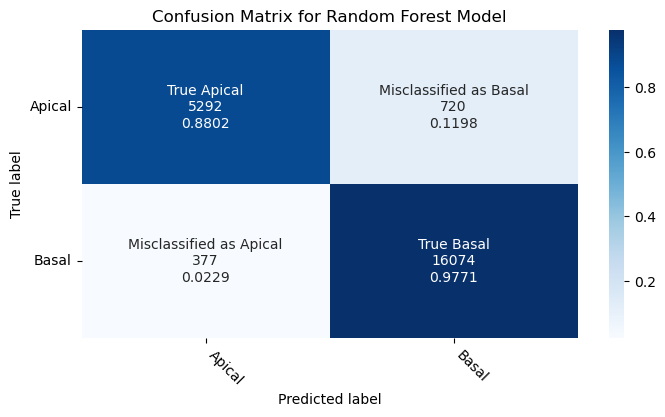

In [23]:
group_names = ['True Apical','Misclassified as Basal','Misclassified as Apical','True Basal']
group_counts = ["{0:0.0f}".format(value) for value in
                coef.flatten()]
group_percentages = ["{0:.4f}".format(value) for value in
                     matrix.flatten()]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,4))
sns.heatmap(matrix, annot=labels, annot_kws={'size':10}, fmt='', cmap='Blues')

# Add labels to the plot
class_names = ['Apical','Basal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks+0.5, class_names, rotation=-45, ha='left')
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Feature importance
Source: [scikit-learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)

## based on mean decrease in impurity

In [24]:
X_colnames = [str(X.columns[i]) for i in range(X.shape[1])]

In [25]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

start_time = time.time()
feature_names = X_colnames
forest = RandomForestClassifier(random_state=random_st)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

In [26]:
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 20.298 seconds


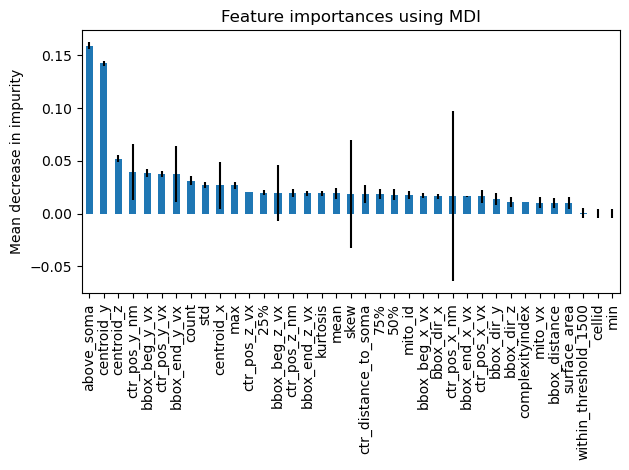

In [27]:
forest_importances = pd.Series(importances, index=feature_names)

# create pareto bar chart
forest_importances_pareto = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances_pareto.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## based on feature permutation

In [28]:
start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=random_st, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances_perm = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 88.305 seconds


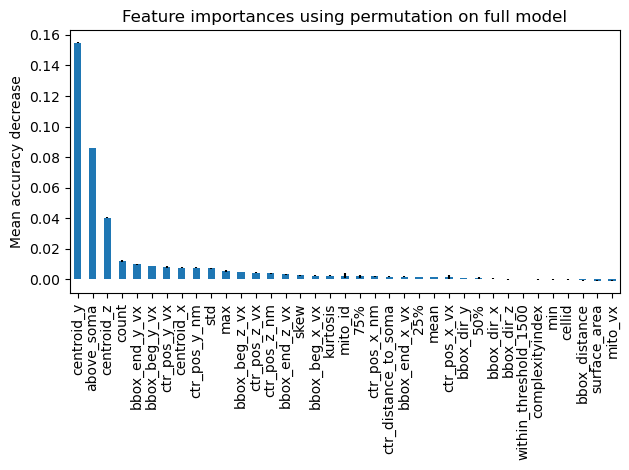

In [29]:
forest_importances_perm_pareto = forest_importances_perm.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances_perm_pareto.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Import unknown dendritic df

In [33]:
unknown_dendritic = pd.read_csv('pyr_unknowndendritic_nostr_mmstats.csv', index_col=[0])
unknown_dendritic

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
0,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,1393,648518346349523993,282824,180320,54560,2.716770,10.804325,Unknown dendritic,70864,42368,24,3029.110100,-782,-410,-65,885.352472,0,0,196.0,6307.454632,5294.853299,0.0,2791.498779,4378.841631,8158.576625,26607.713618,5.541097,2.220513
1,1774335,516120,74524,41666,984,73392,41388,903,75434,41838,1093,648518346349523993,298096,166664,39360,6.773440,28.109598,Unknown dendritic,70864,42368,24,3848.376801,-2042,-450,-190,2099.610440,1,0,196.0,7566.268937,5808.272535,0.0,3782.081357,5032.257927,9528.231655,27537.681311,4.937059,2.058686
2,1662490,3004,71398,43960,1139,71356,43932,1135,71440,43992,1141,648518346349523993,285592,175840,45560,0.102391,2.866273,Unknown dendritic,70864,42368,24,2015.650019,-84,-60,-6,103.402128,0,0,196.0,6073.269636,5674.473901,0.0,2294.075603,3740.158135,8079.002508,26774.752081,5.567801,2.236830
3,1547394,879336,70958,45388,1891,70558,44828,1662,71340,46262,2157,648518346349523993,283832,181552,75640,11.790898,51.080975,Unknown dendritic,70864,42368,24,3551.749569,-782,-1434,-495,1706.723469,0,0,196.0,6512.100850,5110.648731,0.0,3205.207022,4563.925525,8208.348254,26230.706376,5.448838,2.191350
4,1541327,547340,70932,42378,866,70804,41794,785,71188,42902,946,648518346349523993,283728,169512,34640,6.168662,18.879337,Unknown dendritic,70864,42368,24,844.800568,-384,-1108,-161,1183.655778,0,1,196.0,6163.671139,6160.340209,0.0,1504.873059,3839.307731,8101.049803,28171.214315,5.607736,2.249625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,545422,261204,51806,45212,1622,51278,45042,1610,52394,45356,1635,648518346349492197,207224,180848,64880,3.089287,10.412219,Unknown dendritic,67920,39584,2148,17076.652365,-1116,-314,-25,1159.602087,0,0,190.0,20341.084297,9787.632079,0.0,15003.853240,17033.270424,25006.554119,51026.602758,2.268589,1.241689
1133,633845,366232,54084,38652,1164,53490,38578,1120,54614,38726,1212,648518346349492197,216336,154608,46560,4.573971,17.190795,Unknown dendritic,67920,39584,2148,13902.221981,-1124,-148,-92,1137.428679,1,0,190.0,18092.233043,10010.550310,0.0,12552.559723,14057.313489,22983.893509,48606.099628,2.794063,1.424764
1134,973784,2897496,62588,42158,510,59768,41724,74,65388,42622,1025,648518346349492197,250352,168632,20400,30.240936,79.372160,Unknown dendritic,67920,39584,2148,6143.186795,-5620,-898,-951,5770.199737,0,0,190.0,10991.697855,8796.647867,0.0,5289.077021,6715.396244,14679.910696,40098.947779,4.698357,2.012254
1135,1310832,752504,66324,41486,1332,66142,41328,1270,66814,41942,1412,648518346349492197,265296,165944,53280,7.230910,16.087532,Unknown dendritic,67920,39584,2148,2613.556198,-672,-614,-142,921.273032,0,0,190.0,8718.497145,8399.523429,0.0,2469.147283,5702.917607,12741.309694,36325.865895,4.853222,2.070600


In [41]:
unknown_dendritic_drop = unknown_dendritic.drop('compartment', axis=1)
unknown_dendritic_drop

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
0,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,1393,648518346349523993,282824,180320,54560,2.716770,10.804325,70864,42368,24,3029.110100,-782,-410,-65,885.352472,0,0,196.0,6307.454632,5294.853299,0.0,2791.498779,4378.841631,8158.576625,26607.713618,5.541097,2.220513
1,1774335,516120,74524,41666,984,73392,41388,903,75434,41838,1093,648518346349523993,298096,166664,39360,6.773440,28.109598,70864,42368,24,3848.376801,-2042,-450,-190,2099.610440,1,0,196.0,7566.268937,5808.272535,0.0,3782.081357,5032.257927,9528.231655,27537.681311,4.937059,2.058686
2,1662490,3004,71398,43960,1139,71356,43932,1135,71440,43992,1141,648518346349523993,285592,175840,45560,0.102391,2.866273,70864,42368,24,2015.650019,-84,-60,-6,103.402128,0,0,196.0,6073.269636,5674.473901,0.0,2294.075603,3740.158135,8079.002508,26774.752081,5.567801,2.236830
3,1547394,879336,70958,45388,1891,70558,44828,1662,71340,46262,2157,648518346349523993,283832,181552,75640,11.790898,51.080975,70864,42368,24,3551.749569,-782,-1434,-495,1706.723469,0,0,196.0,6512.100850,5110.648731,0.0,3205.207022,4563.925525,8208.348254,26230.706376,5.448838,2.191350
4,1541327,547340,70932,42378,866,70804,41794,785,71188,42902,946,648518346349523993,283728,169512,34640,6.168662,18.879337,70864,42368,24,844.800568,-384,-1108,-161,1183.655778,0,1,196.0,6163.671139,6160.340209,0.0,1504.873059,3839.307731,8101.049803,28171.214315,5.607736,2.249625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,545422,261204,51806,45212,1622,51278,45042,1610,52394,45356,1635,648518346349492197,207224,180848,64880,3.089287,10.412219,67920,39584,2148,17076.652365,-1116,-314,-25,1159.602087,0,0,190.0,20341.084297,9787.632079,0.0,15003.853240,17033.270424,25006.554119,51026.602758,2.268589,1.241689
1133,633845,366232,54084,38652,1164,53490,38578,1120,54614,38726,1212,648518346349492197,216336,154608,46560,4.573971,17.190795,67920,39584,2148,13902.221981,-1124,-148,-92,1137.428679,1,0,190.0,18092.233043,10010.550310,0.0,12552.559723,14057.313489,22983.893509,48606.099628,2.794063,1.424764
1134,973784,2897496,62588,42158,510,59768,41724,74,65388,42622,1025,648518346349492197,250352,168632,20400,30.240936,79.372160,67920,39584,2148,6143.186795,-5620,-898,-951,5770.199737,0,0,190.0,10991.697855,8796.647867,0.0,5289.077021,6715.396244,14679.910696,40098.947779,4.698357,2.012254
1135,1310832,752504,66324,41486,1332,66142,41328,1270,66814,41942,1412,648518346349492197,265296,165944,53280,7.230910,16.087532,67920,39584,2148,2613.556198,-672,-614,-142,921.273032,0,0,190.0,8718.497145,8399.523429,0.0,2469.147283,5702.917607,12741.309694,36325.865895,4.853222,2.070600


In [37]:
X_test

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
99253,1130223,123228,61036,62128,333,60970,61830,321,61140,62390,348,648518346349537851,244144,248512,13320,1.604827,6.558343,62800,70672,523,8726.266785,-170,-560,-27,585.857491,1,0,530.0,10870.835699,4673.239174,0.0,8348.878302,9953.313630,12118.747461,28870.745280,2.995791,1.450113
103054,2630212,170216,89060,56598,2071,88982,56484,2037,89130,56668,2110,648518346349537641,356240,226392,82840,1.918071,5.868420,77376,55856,167,11861.350513,-148,-184,-73,247.161890,0,0,453.0,13790.420204,6779.552390,0.0,10797.894980,12302.186350,14098.406187,41698.847670,4.226888,1.799569
29045,4102083,165788,115252,66846,855,115008,66620,838,115514,66982,882,648518346349496405,461008,267384,34200,2.235900,9.798934,113936,65696,771,1749.689115,-506,-362,-44,623.711472,0,0,501.0,7458.815423,8162.182202,0.0,2003.135792,3311.932970,10773.429398,33798.091085,5.217226,2.172871
3705,3591858,121032,106904,41342,632,106834,40934,622,106978,41682,643,648518346349533350,427616,165368,25280,1.788860,9.415788,104320,46432,596,5708.454432,-144,-748,-21,762.024278,1,0,616.0,11554.823793,9360.829942,0.0,5637.969077,7150.830125,14547.173114,56802.995449,6.301058,2.414987
172085,2961075,275140,95688,51228,1426,95294,50906,1402,96012,51436,1446,648518346349538466,382752,204912,57040,3.546911,14.202722,83920,50688,1441,11780.392566,-718,-530,-44,893.509933,0,0,556.0,13471.172633,5416.693455,0.0,10911.499495,12652.167280,15944.966243,43975.878263,4.172852,1.821036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10482,987433,580860,59428,48382,317,59180,47966,287,59754,49090,339,648518346349531230,237712,193528,12680,5.384792,11.150439,52512,46192,735,7266.490212,-574,-1124,-52,1263.153197,0,0,520.0,12557.435165,10904.379212,0.0,6220.815544,7515.017710,15367.966934,57542.215573,6.058640,2.350123
68612,3712412,670488,110390,45266,1994,108326,44708,1955,112392,45486,2023,648518346349534614,441560,181064,79760,9.327417,43.494101,118416,46336,1663,8103.773010,-4066,-778,-68,4140.321727,1,0,339.0,7479.596231,3067.677344,0.0,6462.034688,7146.040652,7916.008242,24040.157737,4.311651,1.840094
64304,2046261,451708,77916,59068,955,77442,58478,941,78504,59548,969,648518346349538298,311664,236272,38200,4.811913,13.157274,71520,45600,72,14935.713207,-1062,-1070,-28,1507.822271,0,0,495.0,13934.075133,5038.504535,0.0,11637.589252,14053.620316,15928.524752,30137.006819,0.875876,0.737935
135861,2718743,113148,89896,46174,1018,89706,46118,995,90114,46262,1043,648518346349538478,359584,184696,40720,1.463810,5.903217,88704,54768,1372,8683.491003,-408,-144,-48,435.320572,1,0,697.0,13399.931727,7719.541627,0.0,8333.154565,9850.109847,18680.883170,35346.317107,2.299544,1.357980


In [42]:
rfc_pred_unknowndendritic = rfc.predict(unknown_dendritic_drop)
rfc_pred_unknowndendritic

array(['Basal', 'Basal', 'Basal', ..., 'Basal', 'Basal', 'Basal'],
      dtype=object)

In [44]:
unknown_dendritic_predictions = pd.DataFrame({'rfc_predicted_compartment':rfc_pred_unknowndendritic})
unknown_dendritic_predictions

,rfc_predicted_compartment
0,Basal
1,Basal
2,Basal
3,Basal
4,Basal
...,...
1132,Basal
1133,Basal
1134,Basal
1135,Basal


In [45]:
unknown_dendritic_predictions.rfc_predicted_compartment.value_counts()

Basal     1089
Apical      48
Name: rfc_predicted_compartment, dtype: int64

In [46]:
# merge with unknown dendritic df

prediction_col = unknown_dendritic_predictions['rfc_predicted_compartment']
  
unknown_dendritic_join_prediction = unknown_dendritic.join(prediction_col)
unknown_dendritic_join_prediction

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500,count,mean,std,min,25%,50%,75%,max,kurtosis,skew,rfc_predicted_compartment
0,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,1393,648518346349523993,282824,180320,54560,2.716770,10.804325,Unknown dendritic,70864,42368,24,3029.110100,-782,-410,-65,885.352472,0,0,196.0,6307.454632,5294.853299,0.0,2791.498779,4378.841631,8158.576625,26607.713618,5.541097,2.220513,Basal
1,1774335,516120,74524,41666,984,73392,41388,903,75434,41838,1093,648518346349523993,298096,166664,39360,6.773440,28.109598,Unknown dendritic,70864,42368,24,3848.376801,-2042,-450,-190,2099.610440,1,0,196.0,7566.268937,5808.272535,0.0,3782.081357,5032.257927,9528.231655,27537.681311,4.937059,2.058686,Basal
2,1662490,3004,71398,43960,1139,71356,43932,1135,71440,43992,1141,648518346349523993,285592,175840,45560,0.102391,2.866273,Unknown dendritic,70864,42368,24,2015.650019,-84,-60,-6,103.402128,0,0,196.0,6073.269636,5674.473901,0.0,2294.075603,3740.158135,8079.002508,26774.752081,5.567801,2.236830,Basal
3,1547394,879336,70958,45388,1891,70558,44828,1662,71340,46262,2157,648518346349523993,283832,181552,75640,11.790898,51.080975,Unknown dendritic,70864,42368,24,3551.749569,-782,-1434,-495,1706.723469,0,0,196.0,6512.100850,5110.648731,0.0,3205.207022,4563.925525,8208.348254,26230.706376,5.448838,2.191350,Basal
4,1541327,547340,70932,42378,866,70804,41794,785,71188,42902,946,648518346349523993,283728,169512,34640,6.168662,18.879337,Unknown dendritic,70864,42368,24,844.800568,-384,-1108,-161,1183.655778,0,1,196.0,6163.671139,6160.340209,0.0,1504.873059,3839.307731,8101.049803,28171.214315,5.607736,2.249625,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,545422,261204,51806,45212,1622,51278,45042,1610,52394,45356,1635,648518346349492197,207224,180848,64880,3.089287,10.412219,Unknown dendritic,67920,39584,2148,17076.652365,-1116,-314,-25,1159.602087,0,0,190.0,20341.084297,9787.632079,0.0,15003.853240,17033.270424,25006.554119,51026.602758,2.268589,1.241689,Basal
1133,633845,366232,54084,38652,1164,53490,38578,1120,54614,38726,1212,648518346349492197,216336,154608,46560,4.573971,17.190795,Unknown dendritic,67920,39584,2148,13902.221981,-1124,-148,-92,1137.428679,1,0,190.0,18092.233043,10010.550310,0.0,12552.559723,14057.313489,22983.893509,48606.099628,2.794063,1.424764,Basal
1134,973784,2897496,62588,42158,510,59768,41724,74,65388,42622,1025,648518346349492197,250352,168632,20400,30.240936,79.372160,Unknown dendritic,67920,39584,2148,6143.186795,-5620,-898,-951,5770.199737,0,0,190.0,10991.697855,8796.647867,0.0,5289.077021,6715.396244,14679.910696,40098.947779,4.698357,2.012254,Basal
1135,1310832,752504,66324,41486,1332,66142,41328,1270,66814,41942,1412,648518346349492197,265296,165944,53280,7.230910,16.087532,Unknown dendritic,67920,39584,2148,2613.556198,-672,-614,-142,921.273032,0,0,190.0,8718.497145,8399.523429,0.0,2469.147283,5702.917607,12741.309694,36325.865895,4.853222,2.070600,Basal


In [47]:
# uncomment to save as csv

# unknown_dendritic_rfc_prediction_results = unknown_dendritic_join_prediction.to_csv('unknown_dendritic_rfc_prediction_results.csv')

In [48]:
# Get parameter settings for the current rfc 
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}
